In [1]:
! py -m pip install kaggle

In [2]:
import kaggle

In [3]:
! kaggle config set -n path -v C:\Users\pixel\$ML_PATHA\datasets
! kaggle datasets download ziya07/emotional-monitoring-dataset

^C
- path is now set to: C:\Users\pixel\$ML_PATHA\datasets
Dataset URL: https://www.kaggle.com/datasets/ziya07/emotional-monitoring-dataset
License(s): CC0-1.0




  0%|          | 0.00/72.7k [00:00<?, ?B/s]
100%|##########| 72.7k/72.7k [00:00<00:00, 173kB/s]
100%|##########| 72.7k/72.7k [00:00<00:00, 171kB/s]


In [ ]:
! pip install pandas

In [12]:
! pip install matplotlib

In [13]:
import pandas as pd

df = pd.read_csv('datasets\emotional_monitoring_dataset_with_target.csv')

import matplotlib.pyplot as plt

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 109.5+ KB
None


In [14]:
df.head()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3


In [15]:
! pip install scikit-learn

import sklearn

In [16]:
print(df['EmotionalState'].unique())
print(df['CognitiveState'].unique())

['engaged' 'partially engaged' 'disengaged']
['distracted' 'focused']


In [19]:
# preperation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
#turning strings to floats
encEmotional = OrdinalEncoder(categories = [df['EmotionalState'].unique()])
encCognitive = OrdinalEncoder(categories = [df['CognitiveState'].unique()])
df['EmotionalState'] = encEmotional.fit_transform(df[['EmotionalState']])
df['CognitiveState'] = encCognitive.fit_transform(df[['CognitiveState']])

df.head()



,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,0.0,0.0,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,0.0,0.0,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,1.0,1.0,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,2.0,1.0,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,2.0,1.0,3


In [20]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_prep = scaler.fit_transform(df)
print(df_prep[0])

[-1.64029977  0.96766499  0.58813243 -0.55870567  0.9274594   0.94425081
 -0.67374948 -1.48505306  0.96241325  1.66300728 -1.32392132 -1.22399584
 -0.94548368  0.77767259]


In [24]:
! pip install numpy

import numpy as np
corr = np.corrcoef(df_prep.T)

In [25]:
print(df.columns)
print(df.shape)
print(corr.shape)



Index(['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'PupilDiameter',
       'SmileIntensity', 'FrownIntensity', 'CortisolLevel', 'ActivityLevel',
       'AmbientNoiseLevel', 'LightingLevel', 'EmotionalState',
       'CognitiveState', 'EngagementLevel'],
      dtype='object')
(1000, 14)
(14, 14)


In [28]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(corr)
print(eigenvalues)
# the stark difference in eigen values from the first to the remaining implies a high level of correlation which could be explained by one variable with many other variables with a smaller influence
# first variable accounts for 58% of the variance, the top 3 account for 74% of variance

[8.20715038 1.10115007 1.03442568 0.97202012 0.88568031 0.95975624
 0.01428103 0.15490946 0.13965478 0.1204043  0.09156433 0.10302271
 0.10875577 0.10722481]


In [31]:
print(eigenvectors[0])
print(eigenvectors[1])
print(eigenvectors[2])

[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]
[ 0.31081722  0.17806044  0.10216028  0.140087   -0.17157724 -0.01682645
  0.11079287  0.79196299  0.05201317 -0.20311887  0.16594236  0.10983354
  0.13306067  0.26675019]
[ 3.26666880e-01  8.53073162e-02  3.84452050e-02  8.17843825e-02
 -8.25900564e-02 -2.45457936e-02  1.25127917e-01 -4.20707011e-01
 -3.66125787e-05  2.91565924e-01  6.94791880e-02 -6.63591464e-02
  3.61006747e-01  6.73202971e-01]


In [53]:
# axis= np.matrix([df * eigenvectors[0], df * eigenvectors[1]])
df_matrix = np.matrix(df)
print(eigenvectors.T[0].shape)
print(eigenvectors[0].transpose().shape)
print(eigenvectors[0].shape)
print("")
print(eigenvectors.T[0])
print(eigenvectors[0].T)
print(eigenvectors[0])


(14,)
(14,)
(14,)

[-0.33038525  0.31081722  0.32666688 -0.15927825  0.32585023  0.33140746
 -0.32937948 -0.33225238  0.32507098 -0.00514406 -0.00035349 -0.34646773
 -0.00224119 -0.039026  ]
[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]
[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]


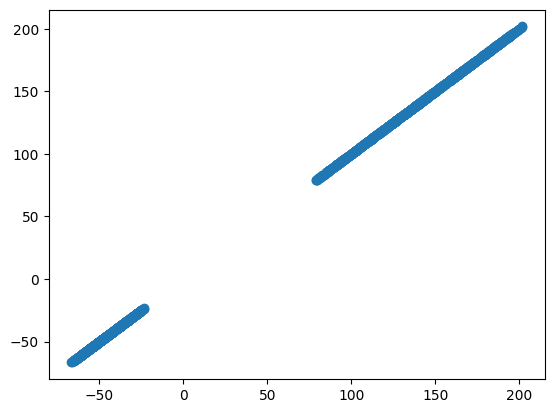

In [88]:
axis = np.array([[eigenvectors[0] * df_matrix.transpose()], 
                 [eigenvectors[1]* df_matrix.transpose()]])

plt.scatter(axis[0], axis[1])
plt.show()

In [84]:
for x in df.columns:
    print(x)

for y in eigenvectors[0]:
    print(y)    

HeartRate
SkinConductance
EEG
Temperature
PupilDiameter
SmileIntensity
FrownIntensity
CortisolLevel
ActivityLevel
AmbientNoiseLevel
LightingLevel
EmotionalState
CognitiveState
EngagementLevel
-0.3303852467029443
0.06036009359898652
0.015033926112002742
0.052046735370304346
0.002667059631794673
6.68870527499411e-05
-0.12107856066657603
-0.07438818134208519
0.06327480878809595
-0.4298134360054729
-0.006481828238846027
-0.057837786949104866
0.8091865860931564
-0.1309701614859095


In [86]:
axis[0].shape

(1, 1, 1000)